In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm


# Load data from winequality-red.csv
Data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)
Data = np.loadtxt('cleaned_data.csv', delimiter=',', skiprows=1)
print(Data.shape)
y = Data[:, -1]
X = Data[:, :-1]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=70)


(1395, 12)


In [13]:
svc_clf = SVC(kernel='rbf', C=1.0, random_state=1, degree=3, gamma='auto')
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.53


In [14]:
# Calculate the MSE
MSE = np.mean((y_pred - y_test)**2)
print('MSE: %.4f' % MSE)

MSE: 0.6993


In [15]:
# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svc_clf.fit(X_train_std,y_train)
y_pred = svc_clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.63


In [16]:
# Calculate the MSE
MSE = np.mean((y_pred - y_test)**2)
print('MSE: %.4f' % MSE)

MSE: 0.4869


In [17]:
# Grid search for best parameters
param_grid = {'C': np.linspace(0.1, 10, 10),
                'gamma': np.linspace(0.1, 1, 10),
                'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train_std, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.564 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.610 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.566 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.590 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.615 total time=   0.0s


c:\Users\quanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.574 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.569 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.597 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.569 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.590 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.2, kernel=rbf;, score=0.602 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.2, kernel=rbf;, score=0.564 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.2, kernel=rbf;, score=0.610 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.2, kernel=rbf;, score=0.590 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.2, kernel=rbf;, score=0.610 total time=   0.0s
[CV 1/5] END .....C=0.1, gam

In [18]:
# Grid search for best parameters
param_grid = {'C': np.linspace(1.8, 2.8, 20),
                'gamma': np.linspace(0.6, 0.8, 20),
                'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train_std, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_std)
print('Accuracy: %.4f' % accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 1/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.610 total time=   0.0s
[CV 3/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.672 total time=   0.0s
[CV 4/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.682 total time=   0.0s


c:\Users\quanh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END ......C=1.8, gamma=0.6, kernel=rbf;, score=0.651 total time=   0.0s
[CV 1/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.605 total time=   0.0s
[CV 3/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.672 total time=   0.0s
[CV 4/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.687 total time=   0.0s
[CV 5/5] END C=1.8, gamma=0.6105263157894737, kernel=rbf;, score=0.651 total time=   0.0s
[CV 1/5] END C=1.8, gamma=0.6210526315789473, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END C=1.8, gamma=0.6210526315789473, kernel=rbf;, score=0.605 total time=   0.0s
[CV 3/5] END C=1.8, gamma=0.6210526315789473, kernel=rbf;, score=0.677 total time=   0.0s
[CV 4/5] END C=1.8, gamma=0.6210526315789473, kernel=rbf;, score=0.687 total time=   0.0s
[CV 5/5] END C=1.8, gamma=0.6210526315789473, kernel=rbf;, score=0.651 total time=   0.0s
[CV 1/5] END C=1.8,

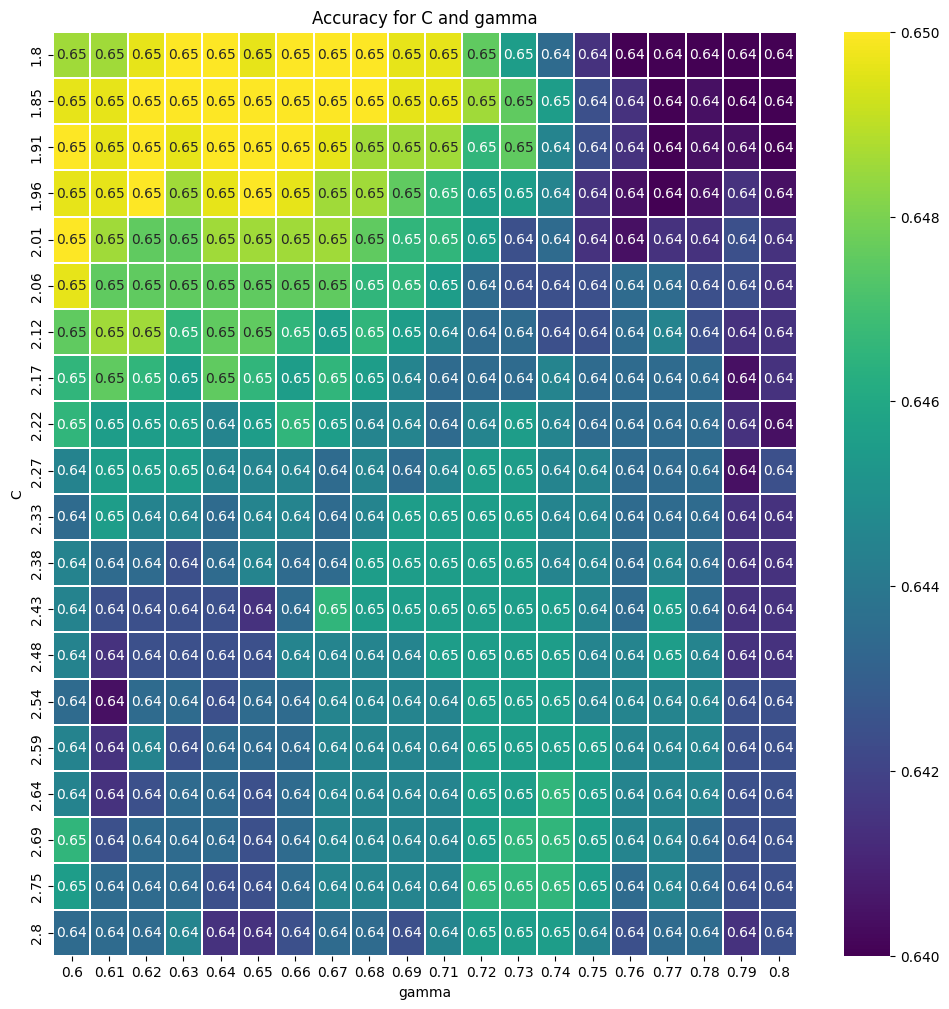

In [19]:
# visualize the accuracy of the model with with best grid search parameters
C_range = np.linspace(1.8, 2.8, 20)
gamma_range = np.linspace(0.6, 0.8, 20)
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))
plt.figure(figsize=(12, 12))
sns.heatmap(scores, vmin=0.64, vmax=0.65, cmap='viridis', annot=True, annot_kws={"size": 10}, fmt='.2f', linewidths=0.01,
            linecolor="white", xticklabels=np.round(gamma_range, 2), yticklabels=np.round(C_range, 2))
plt.title('Accuracy for C and gamma')
plt.xlabel('gamma')
plt.ylabel('C')
plt.show()



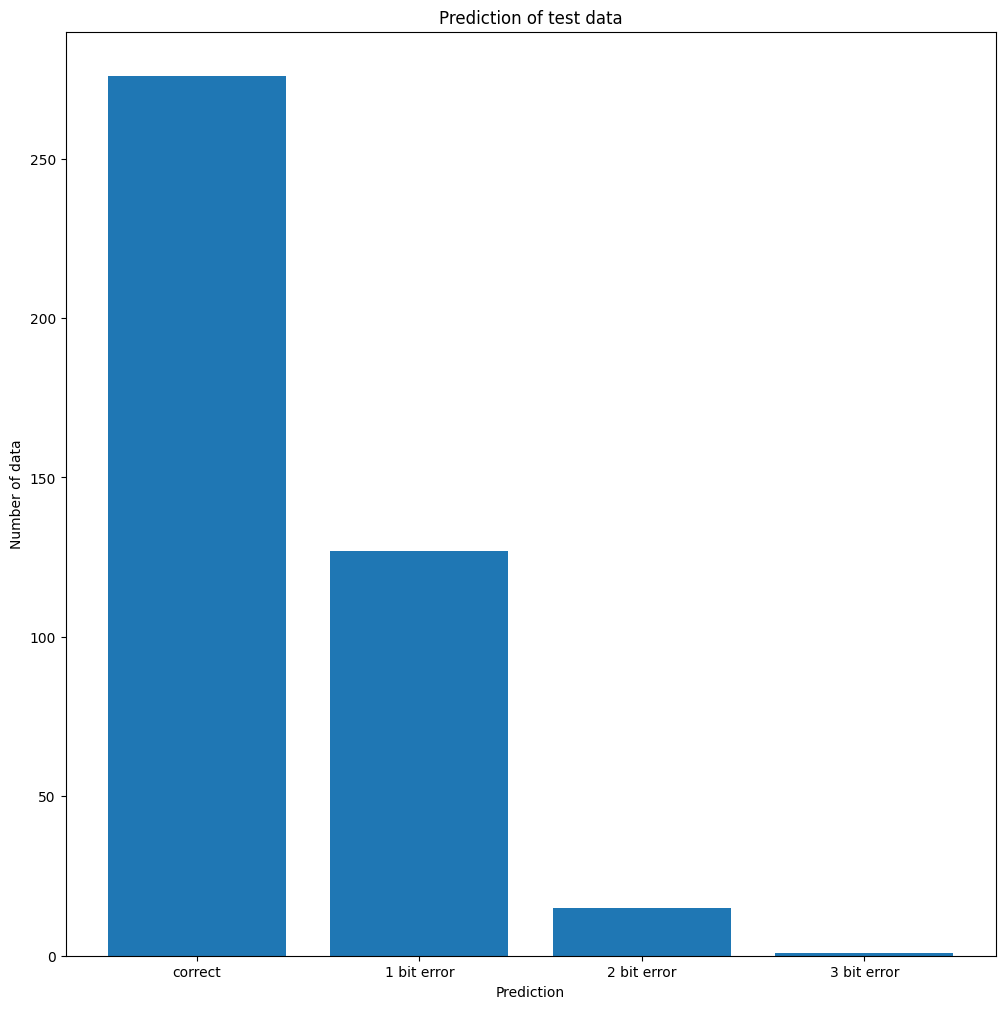

MSE of prediction: 0.4678


In [20]:
# visualize the prediction of model of test, make them in 3 plots
# bar plot of correct prediction, 1 bit error prediction, 2 bit error prediction, 3 bit error prediction
# best parameters: C =1.8526315789473684, gamma=0.631578947368421
svc_clf = SVC(kernel='rbf', C=1.8526315789473684, random_state=1, degree=3, gamma=0.631578947368421)
svc_clf.fit(X_train_std,y_train)
y_pred = svc_clf.predict(X_test_std)
correct = 0
one_bit_error = 0
two_bit_error = 0
threemore_bit_error = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        correct += 1
    elif abs(y_pred[i] - y_test[i]) == 1:
        one_bit_error += 1
    elif abs(y_pred[i] - y_test[i]) == 2:
        two_bit_error += 1
    else:
        threemore_bit_error += 1
plt.figure(figsize=(12, 12))
plt.bar(['correct', '1 bit error', '2 bit error', '3 bit error'], [correct, one_bit_error, two_bit_error, threemore_bit_error])
plt.title('Prediction of test data')
plt.xlabel('Prediction')
plt.ylabel('Number of data')
plt.show()

#print MSE of prediction
print('MSE of prediction: %.4f' % np.mean((y_pred - y_test)**2))